In [ ]:
!pip install matplotlib==3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st
import math

In [ ]:
sns.set_theme(style="darkgrid")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('/content/drive/My Drive/Dados/PE/data_amostra.csv') 

Mounted at /content/drive


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving data_amostra_2.csv to data_amostra_2.csv
User uploaded file "data_amostra_2.csv" with length 25677 bytes


In [ ]:
df = pd.read_csv('data_amostra_2.csv') 
df.head()

,Unnamed: 0,Unnamed: 0.1,valor,bairro,zona,categoria,area,qtde_quartos,qtde_vagas,qtde_banheiros
0,3,4,450000.0,Adrianópolis,Centro-Sul,Apartamentos,120.0,3.0,2.0,2.0
1,12,13,160000.0,Lago Azul,Norte,Apartamentos,60.0,3.0,1.0,2.0
2,21,22,200129.0,Tarumã,Oeste,Apartamentos,70.0,2.0,1.0,1.0
3,30,34,580000.0,Colônia Terra Nova,Norte,Casas,175.0,3.0,4.0,4.0
4,39,43,1450000.0,Ponta Negra,Oeste,Casas,246.0,4.0,5.0,5.0


## Histogramas

Cálculo do intervalo: 


In [ ]:
h = df["qtde_quartos"].max() - df["qtde_quartos"].min()
h

4.0

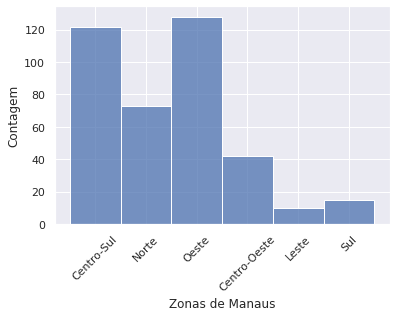

In [ ]:
ax = sns.histplot(data=df, x="zona", binwidth=1, discrete=True)
ax.set(xlabel='Zonas de Manaus', ylabel='Contagem')
plt.xticks(rotation = 45)
plt.show()

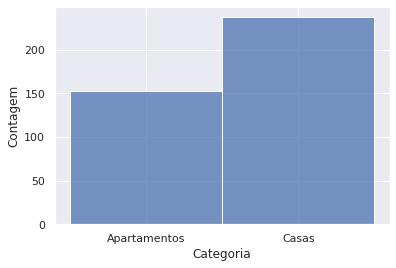

In [ ]:
ax = sns.histplot(data=df, x="categoria", binwidth=1, discrete=True)
ax.set(xlabel='Categoria', ylabel='Contagem')
plt.show()

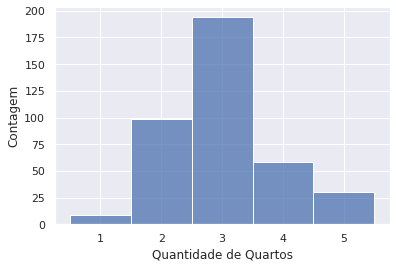

In [ ]:
ax = sns.histplot(data=df, x="qtde_quartos", binwidth=1, discrete=True)
ax.set(xlabel='Quantidade de Quartos', ylabel='Contagem')
plt.show()

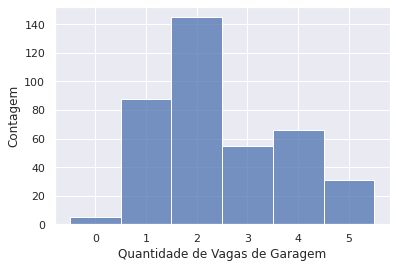

In [ ]:
ax = sns.histplot(data=df, x="qtde_vagas", binwidth=1, discrete=True)
ax.set(xlabel='Quantidade de Vagas de Garagem', ylabel='Contagem')
plt.show()

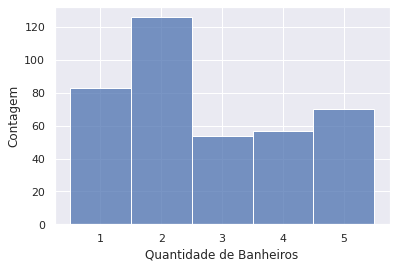

In [ ]:
ax = sns.histplot(data=df, x="qtde_banheiros", binwidth=1, discrete=True)
ax.set(xlabel='Quantidade de Banheiros', ylabel='Contagem')
plt.show()

In [ ]:
df["area"].quantile(q=0.95)

512.099999999999

In [ ]:
# h = 600 - df["area"].min()
h = df["area"].max() - df["area"].min()
print(h)
print(h/10)

2448.0
244.8


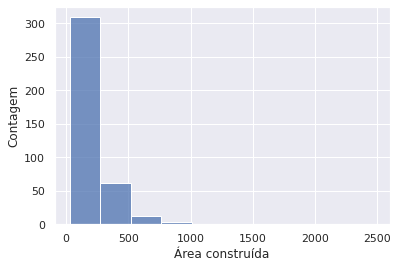

In [ ]:
ax = sns.histplot(data=df, x="area", binwidth=244.8)
ax.set(xlabel='Área construída', ylabel='Contagem')
plt.show()

In [ ]:
# ax = sns.histplot(data=np.clip(df["area"], 30, 600 ), binwidth=57)
# ax.set(xlabel='Área construída (percentil 95)', ylabel='Contagem')
# plt.show()

In [ ]:
df['valor'].describe().apply(lambda x: format(x, 'f'))

count        390.000000
mean      813271.864103
std       987299.908491
min        40000.000000
25%       261250.000000
50%       450000.000000
75%       899750.000000
max      7500000.000000
Name: valor, dtype: object

In [ ]:
df["valor"].quantile(q=0.95)

2972966.249999997

In [ ]:
h = df["valor"].max() - df["valor"].min()
print(h)
print(h/10)

7460000.0
746000.0


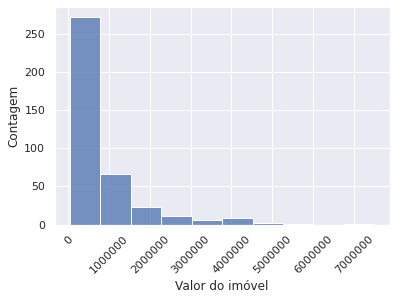

In [ ]:
ax = sns.histplot(data=df, x="valor", binwidth=746000.0)
ax.set(xlabel='Valor do imóvel', ylabel='Contagem')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)

plt.show()

In [ ]:
# ax = sns.histplot(data=np.clip(df["valor"], 40000, 2314950), binwidth=113747.5)
# ax.set(xlabel='Valor do imóvel (percentil 95)', ylabel='Contagem')

# plt.ticklabel_format(style='plain', axis='x')

# plt.show()

## Boxplot

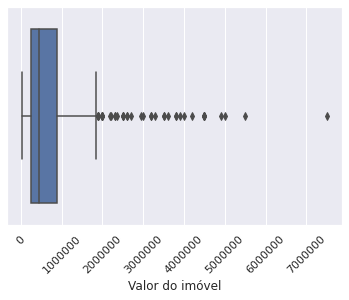

In [ ]:
ax = sns.boxplot(x=df["valor"])
ax.set(xlabel='Valor do imóvel')

plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)

plt.show()

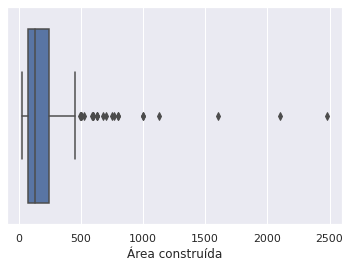

In [ ]:
ax = sns.boxplot(x=df["area"])
ax.set(xlabel='Área construída')

plt.ticklabel_format(style='plain', axis='x')

plt.show()

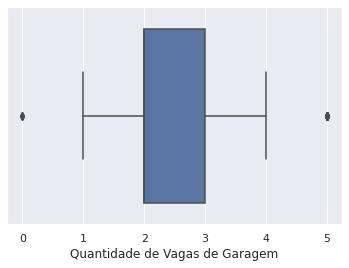

In [ ]:
ax = sns.boxplot(x=df["qtde_vagas"])
ax.set(xlabel='Quantidade de Vagas de Garagem')

plt.ticklabel_format(style='plain', axis='x')

plt.show()

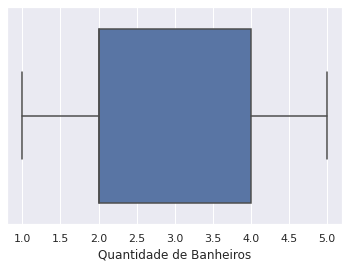

In [ ]:
ax = sns.boxplot(x=df["qtde_banheiros"])
ax.set(xlabel='Quantidade de Banheiros')

plt.ticklabel_format(style='plain', axis='x')

plt.show()

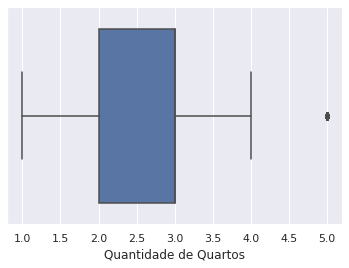

In [ ]:
ax = sns.boxplot(x=df["qtde_quartos"])
ax.set(xlabel='Quantidade de Quartos')

plt.ticklabel_format(style='plain', axis='x')

plt.show()

## Frequencias

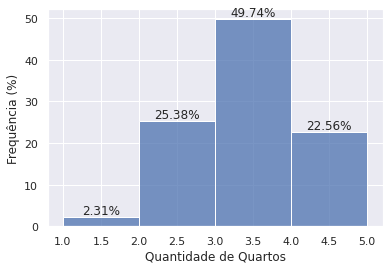

In [ ]:
fig, ax = plt.subplots()

y = sns.histplot(data=df, x="qtde_quartos", binwidth=1, stat='percent', element="bars", legend=False)
y.set(xlabel='Quantidade de Quartos', ylabel='Frequência (%)')

y.bar_label(y.containers[0], fmt='%.2f%%')


plt.show()

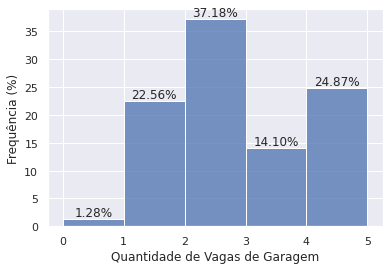

In [ ]:
fig, ax = plt.subplots()

y = sns.histplot(data=df, x="qtde_vagas", binwidth=1, stat='percent', element="bars", legend=False)
y.set(xlabel='Quantidade de Vagas de Garagem', ylabel='Frequência (%)')

y.bar_label(y.containers[0], fmt='%.2f%%')


plt.show()

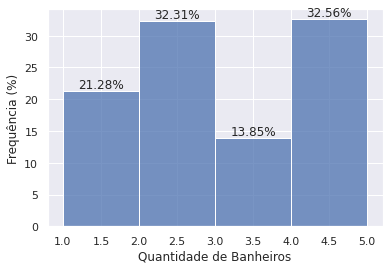

In [ ]:
fig, ax = plt.subplots()

y = sns.histplot(data=df, x="qtde_banheiros", binwidth=1, stat='percent', element="bars", legend=False)
y.set(xlabel='Quantidade de Banheiros', ylabel='Frequência (%)')

y.bar_label(y.containers[0], fmt='%.2f%%')


plt.show()

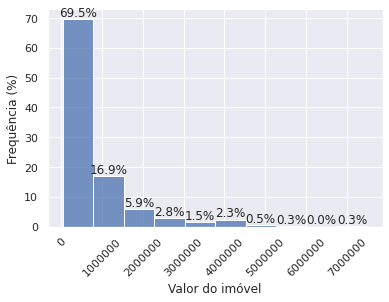

In [ ]:
fig, ax = plt.subplots()

y = sns.histplot(data=df, x="valor", binwidth=746000.0, stat='percent', element="bars", legend=False)
y.set(xlabel='Valor do imóvel', ylabel='Frequência (%)')

y.bar_label(y.containers[0], fmt='%.1f%%')


plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation = 45)


plt.show()

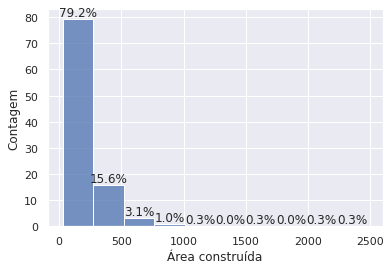

In [ ]:
fig, ax = plt.subplots()

y = sns.histplot(data=df, x="area", binwidth=244.8, stat='percent', element="bars", legend=False)
y.set(xlabel='Área construída', ylabel='Contagem')

y.bar_label(y.containers[0], fmt='%.1f%%')

plt.ticklabel_format(style='plain', axis='x')

plt.show()